<a href="https://colab.research.google.com/github/Forkyknight/Face_recognition/blob/master/face_recognition_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [3]:
!kaggle datasets download -d chiragsoni/faceRecognition

 85% 19.0M/22.3M [00:00<00:00, 62.6MB/s]
100% 22.3M/22.3M [00:00<00:00, 88.6MB/s]


In [4]:
!unzip "faceRecognition.zip"

Streaming output truncated to the last 5000 lines.
  inflating: unknown/Training_63102095.jpg  
  inflating: unknown/Training_6310242.jpg  
  inflating: unknown/Training_63103479.jpg  
  inflating: unknown/Training_63104919.jpg  
  inflating: unknown/Training_63109430.jpg  
  inflating: unknown/Training_63119224.jpg  
  inflating: unknown/Training_6312930.jpg  
  inflating: unknown/Training_63156448.jpg  
  inflating: unknown/Training_6315722.jpg  
  inflating: unknown/Training_63158593.jpg  
  inflating: unknown/Training_63168624.jpg  
  inflating: unknown/Training_63169844.jpg  
  inflating: unknown/Training_6317244.jpg  
  inflating: unknown/Training_63185067.jpg  
  inflating: unknown/Training_63185132.jpg  
  inflating: unknown/Training_63191922.jpg  
  inflating: unknown/Training_63236874.jpg  
  inflating: unknown/Training_63239140.jpg  
  inflating: unknown/Training_63239969.jpg  
  inflating: unknown/Training_63243097.jpg  
  inflating: unknown/Training_63244955.jpg  
  inflat

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")


In [6]:
!mkdir face_img

In [7]:
!mv forkyknight unknown face_img

In [8]:
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("face_img"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

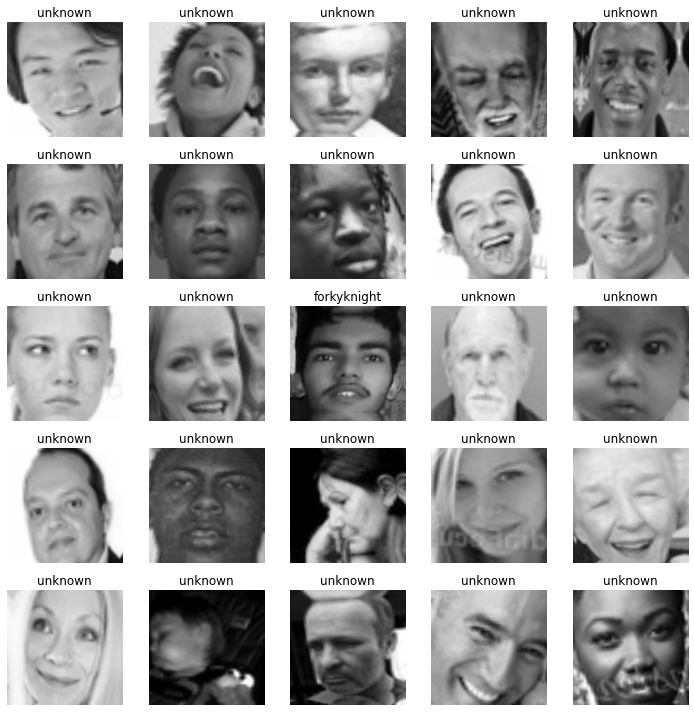

In [9]:
data.show_batch(rows=5, figsize=(10,10))

In [10]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [11]:
resnet_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.255345,0.030348,0.004913,03:05
1,0.043151,0.009222,0.001890,03:00
2,0.015226,0.008520,0.001890,03:00
3,0.008854,0.006266,0.001512,02:59


In [12]:
path="/content/drive/My Drive/dl_projects/face rec/"
resnet_learn.save(path +"stage-1")
resnet_learn.export(path +"export.pkl")

In [14]:
interp = ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

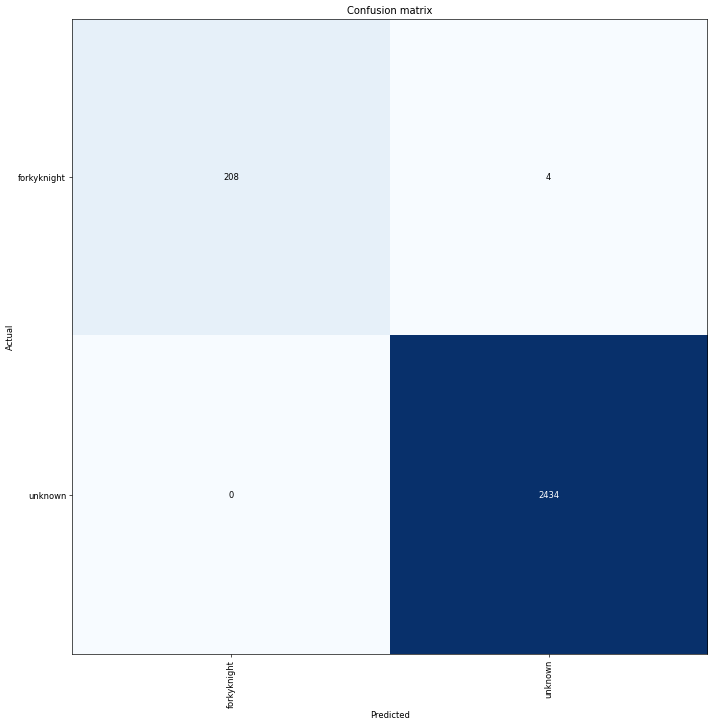

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
from kora.drive import upload_public
url = upload_public(path +"export.pkl")
url

'https://drive.google.com/uc?id=1vVIz8jAmQG0CHreQ-_-Mr9-KlSX6fOra'